Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings('ignore')


Loading Dataset

In [16]:
df=pd.read_csv("/content/lifestyle_sustainability_data.csv")


Overview of the Data

In [17]:
df.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ParticipantID                  499 non-null    int64 
 1   Age                            499 non-null    int64 
 2   Location                       499 non-null    object
 3   DietType                       499 non-null    object
 4   LocalFoodFrequency             499 non-null    object
 5   TransportationMode             499 non-null    object
 6   EnergySource                   499 non-null    object
 7   HomeType                       499 non-null    object
 8   HomeSize                       499 non-null    int64 
 9   ClothingFrequency              499 non-null    object
 10  SustainableBrands              499 non-null    bool  
 11  EnvironmentalAwareness         499 non-null    int64 
 12  CommunityInvolvement           381 non-null    object
 13  Month

In [39]:
columns_to_drop = ['Age', 'Gender']  # Replace with actual column names
df_cleaned = df.drop(columns=columns_to_drop)

Convert categorical variables to numerical using one-hot encoding

In [40]:
df_encoded = pd.get_dummies(df, drop_first=True)

Convert the Rating to Binary

In [41]:

df_encoded['Rating_Binary'] = df_encoded['Rating'].apply(lambda x: 1 if x == 5 else 0)



Checking the Distribution of the Binary Target Variable

In [42]:
print(df_encoded['Rating_Binary'].value_counts())

Rating_Binary
0    323
1    176
Name: count, dtype: int64


Define Features and Target Variable

In [43]:

X = df_encoded.drop(['Rating', 'Rating_Binary'], axis=1)
y = df_encoded['Rating_Binary']


Split the Dataset

In [44]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


 Feature Scaling

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 Train the Logistic Regression Model

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Make Predictions

In [47]:
y_pred = model.predict(X_test)

Evaluate the Model

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy:.2f}")


Accuracy of the model: 0.81


Generate the confusion matrix

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[86 18]
 [10 36]]


Generate the classification report

In [50]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       104
           1       0.67      0.78      0.72        46

    accuracy                           0.81       150
   macro avg       0.78      0.80      0.79       150
weighted avg       0.83      0.81      0.82       150



Visualize the Confusion Matrix

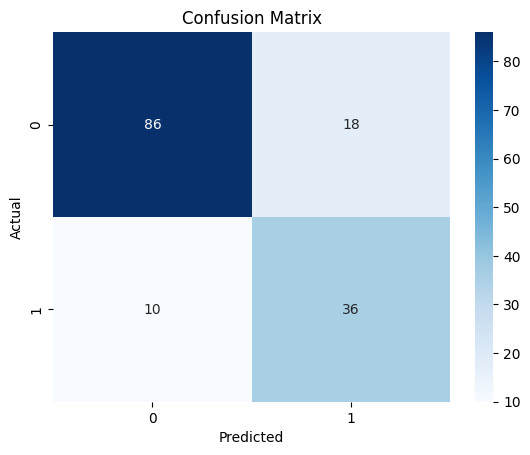

In [51]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
